# Data Exploration

In [1]:
# Basic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For Text processing
import string
import re
import warnings
warnings.filterwarnings('ignore')

# Install and import nltk and upprade if necessary libraries
#%pip install nltk
import nltk
#%pip install --upgrade pandas
#%pip install openpyxl --upgrade
 #pandas matplotlib numpy nltk seaborn sklearn gensim pyldavis wordcloud textblob spacy textstat'


In [2]:
# Read excel file
df = pd.read_excel('Group1.xlsx')
df

,SenderID,ReceiverID,ActionType,NegoOutcome,Content
0,70,69,Offer,FinalAccept,"Dear Mr. Mendel, \nHope you are doing well! \n..."
1,69,70,Counteroffer,FinalAccept,"Dear Mr. Novak, \nThank you for reaching out t..."
2,70,69,Counteroffer,FinalAccept,"Dear Mr. Mendel, \nThank your kind response – ..."
3,69,70,Counteroffer,FinalAccept,"Dear Mr. Novak, \nThank you for your swift rep..."
4,70,69,Counteroffer,FinalAccept,"Dear Mr. Mendel, \nThank you for your proposal..."
...,...,...,...,...,...
2327,851,856,Counteroffer,FinalReject,"Dear Chis Meyer,\n \nthank you for your latest..."
2328,856,851,Counteroffer,FinalReject,"Dear Alex Kramer,\nthank you very much for you..."
2329,851,856,Counteroffer,FinalReject,"Dear Chris Meyer,\nthank you for your fast ans..."
2330,856,851,Counteroffer,FinalReject,"Dear Alex Kramer,\nI am still very interested ..."


The dataset contains only 5 columns, the SenderID, ReceiverID, ActionType,NegoOutcome and Content of the message.

For the further analysis, we will be exploring the 2332 rows from this dataset.




# Analyzing text statistics
We will begin by running text statistics visualizations some very insightful techniques. 

They include:

- word frequency analysis,
- sentence length analysis,
- average word length analysis,
- etc.

Those really help explore the fundamental characteristics of the text data.

To do so, we will be mostly using histograms (continuous data) and bar charts (categorical data).

First, I’ll take a look at the number of characters present in each sentence. This can give us a rough idea about the news headline length.

<Axes: >

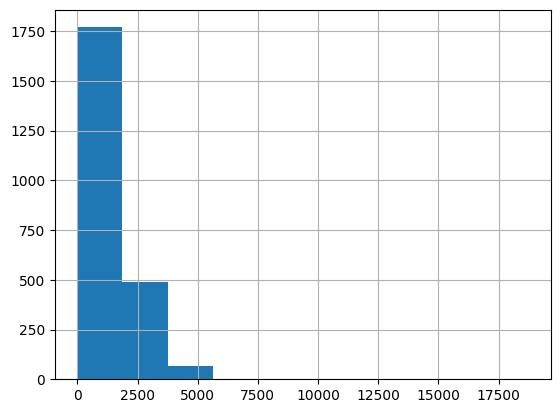

In [3]:
df['Content'].str.len().hist()


The histogram shows that Content range from 0 to 5200 characters and generally, it is between 0 to 1500 characters.

Now, we will move on to data exploration at a word-level. Let’s plot the number of words appearing in each Content.



<Axes: >

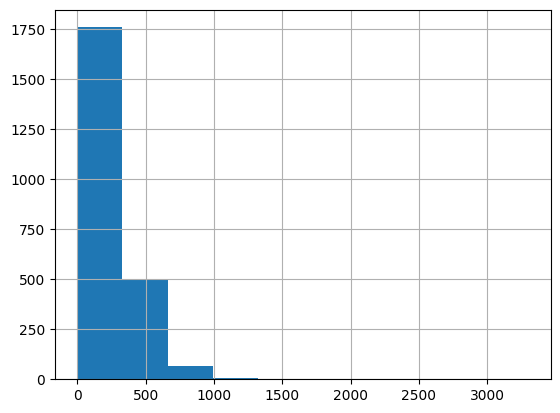

In [4]:
df["Content"].str.split().map(lambda x: len(x)).hist()


It is clear that the number of words in the content columns  ranges from 0 to 500 and mostly falls between 100 to 300 words.

Up next, let’s check the average word length in each sentence.

<Axes: >

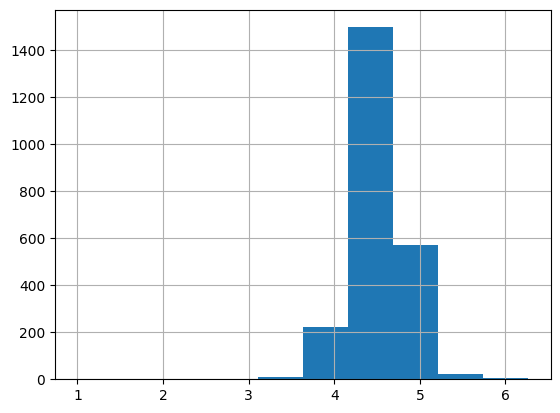

In [5]:
df['Content'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()

We note that the avg word length is around 3-6 words per sentence. Does this imply that the users are using really short sentecens or are they using short words, we will find out in the next steps.

One reason why this may not be true is stopwords. Stopwords are the words that are most commonly used in any language such as “the”,” a”,” an” etc. As these words are probably small in length these words may have caused the above graph to be right-skewed.

Analyzing the amount and the types of stopwords can give us some good insights into the data.

To get the corpus containing stopwords you can use the nltk library. Nltk contains stopwords from many languages. Since we are only dealing with English news I will filter the English stopwords from the corpus.

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\TColt/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


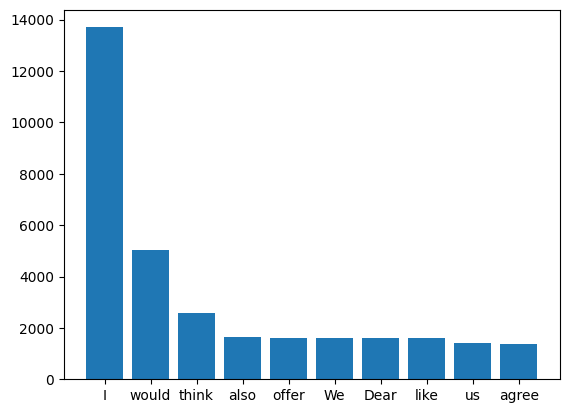

In [6]:
import matplotlib.pyplot as plt
from collections import defaultdict
from nltk.corpus import stopwords

# Ensure stopwords are downloaded
import nltk
nltk.download('stopwords')

# Define stopwords
stop = set(stopwords.words('english'))

# Create the corpus
corpus = []
df_new = df['Content'].str.split()
df_new = df_new.values.tolist()
corpus = [word for sublist in df_new for word in sublist]

# Create the dictionary
dic = defaultdict(int)
for word in corpus:
    if word not in stop:
        dic[word] += 1

# Plot the top 10 words
if dic:
    top = sorted(dic.items(), key=lambda x: x[1], reverse=True)[:10]
    if top:
        x, y = zip(*top)
        plt.bar(x, y)
        plt.show()
    else:
        print("The dictionary does not contain enough items to display.")
else:
    print("The dictionary 'dic' is empty or not defined.")

We can evidently see that stopwords such as “I”,”would” and “think” dominate in the content parameter.

So now we know which stopwords occur frequently in our text, let’s inspect which words other than these stopwords occur frequently.

We will use the counter function from the collections library to count and store the occurrences of each word in a list of tuples. This is a very useful function when we deal with word-level analysis in natural language processing.



<Axes: >

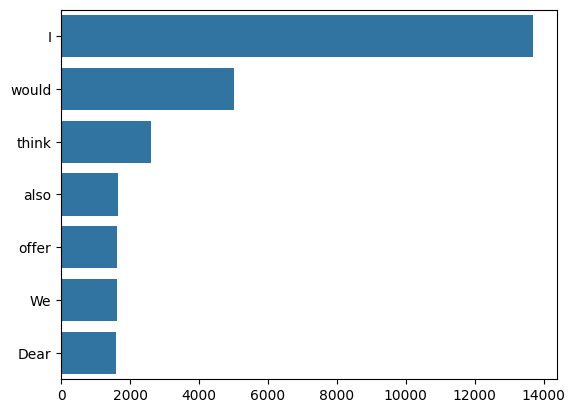

In [7]:
from collections import Counter

counter = Counter(corpus)
most = counter.most_common()

x, y = [], []
for word, count in most[:40]:
    if word not in stop:
        x.append(word)
        y.append(count)

sns.barplot(x=y, y=x)


# Ngram exploration
Ngrams are simply contiguous sequences of n words. For example “riverbank”,” The three musketeers” etc.If the number of words is two, it is called bigram. For 3 words it is called a trigram and so on.

Looking at most frequent n-grams can give you a better understanding of the context in which the word was used.

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

<Axes: >

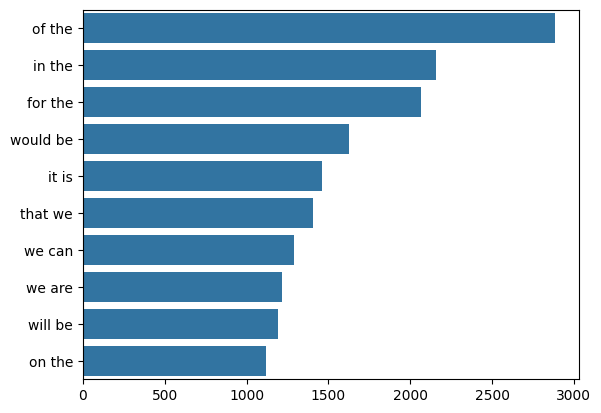

In [9]:
top_n_bigrams=get_top_ngram(df["Content"],2)[:10] 
x,y=map(list,zip(*top_n_bigrams)) 
sns.barplot(x=y,y=x)

<Axes: >

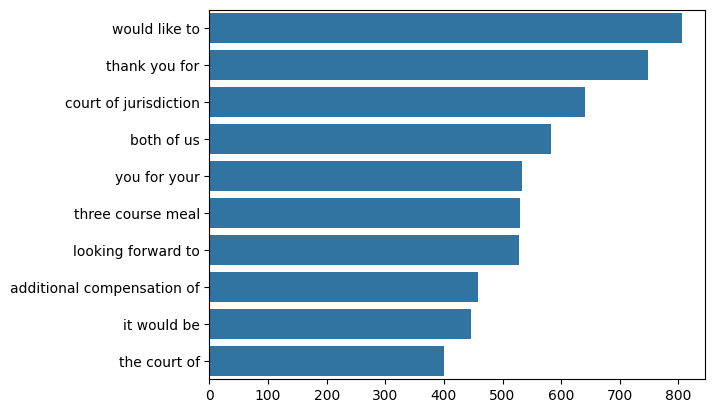

In [10]:
top_tri_grams=get_top_ngram(df['Content'],n=3)
x,y=map(list,zip(*top_tri_grams))
sns.barplot(x=y,y=x)

# Topic modeling exploration with pyLDAvis
Topic modeling is the process of using unsupervised learning techniques to extract the main topics that occur in a collection of documents.

Latent Dirichlet Allocation (LDA) is an easy to use and efficient model for topic modeling. Each document is represented by the distribution of topics and each topic is represented by the distribution of words.

Once we categorize our documents in topics we can dig into further data exploration for each topic or topic group.

But before getting into topic modeling we have to pre-process our data a little. We will:

- tokenize: the process by which sentences are converted to a list of tokens or words.
- remove stopwords
- lemmatize: reduces the inflectional forms of each word into a common base or root.
- convert to the bag of words: Bag of words is a dictionary where the keys are words(or ngrams/tokens) and values are the number of times each word occurs in the corpus.

In [11]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import PorterStemmer	
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


def preprocess_df(df):
    corpus=[]
    stem=PorterStemmer()
    lem=WordNetLemmatizer()
    for df in df['Content']:
        words=[w for w in word_tokenize(df) if (w not in stop)]

        words=[lem.lemmatize(w) for w in words if len(w)>2]

        corpus.append(words)
    return corpus

corpus=preprocess_df(df)


[nltk_data] Downloading package punkt to C:\Users\TColt/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\TColt/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [12]:

import gensim
dic=gensim.corpora.Dictionary(corpus)
bow_corpus = [dic.doc2bow(doc) for doc in corpus]


In [13]:
lda_model = gensim.models.LdaMulticore(bow_corpus,
                                   num_topics = 4,
                                   id2word = dic,
                                   passes = 10,
                                   workers = 2)
lda_model.show_topics()


[(0,
  '0.004*"week" + 0.004*"well" + 0.003*"company" + 0.003*"would" + 0.003*"organization" + 0.003*"year" + 0.003*"local" + 0.003*"issue" + 0.003*"believe" + 0.003*"Constance"'),
 (1,
  '0.023*"would" + 0.019*"event" + 0.016*"ISA" + 0.014*"think" + 0.010*"week" + 0.009*"conference" + 0.008*"local" + 0.007*"also" + 0.007*"offer" + 0.006*"important"'),
 (2,
  '0.017*"would" + 0.015*"worker" + 0.012*"Hurm" + 0.010*"compensation" + 0.010*"additional" + 0.010*"offer" + 0.009*"SVN" + 0.008*"Slovenia" + 0.008*"board" + 0.008*"Tech"'),
 (3,
  '0.020*"offer" + 0.015*"would" + 0.014*"Alex" + 0.013*"Chris" + 0.011*"think" + 0.010*"week" + 0.009*"Dear" + 0.009*"regard" + 0.008*"issue" + 0.008*"sponsor"')]

The topic 0 indicates something related to Alex war and Chris. 

You can print all the topics and try to make sense of them but there are tools that can help you run this data exploration more efficiently. One such tool is pyLDAvis which visualizes the results of LDA interactively.

In [14]:
# Install pyLDAvis if not already installed
%pip install pyLDAvis

import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dic)
vis


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.122601  0.098268       1        1  42.136808
1      0.007499 -0.095103       2        1  38.441639
3     -0.024688 -0.080275       3        1  18.031583
0      0.139790  0.077110       4        1   1.389970, topic_info=         Term         Freq        Total Category  logprob  loglift
2604    event  2084.000000  2084.000000  Default  30.0000  30.0000
167    worker  1732.000000  1732.000000  Default  29.0000  29.0000
6408      ISA  1781.000000  1781.000000  Default  28.0000  28.0000
1429     week  1504.000000  1504.000000  Default  27.0000  27.0000
6406     Alex  1183.000000  1183.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
6454      Art     7.991439   845.330340   Topic4  -6.1252  -0.3855
108    member     7.831577   829.038688   Topic4  -6.1455  -0.3862
475     offer     7.741226  2670.020189   Topic4  -6.1571  -1.5674
181      This     7.506575   769.153338   Topic4  -6.1878  -0.3536
33    already     7.485038   817.464564   Topic4  -6.1907  -0.4174

[339 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
6561      2  0.966357     2010
9095      3  0.938694     3000
9096      3  0.957162      400
9097      3  0.892812      500
9099      3  0.941575     6000
...     ...       ...      ...
944       2  0.737009     year
944       3  0.031141     year
944       4  0.028546     year
6498      2  0.968069  younger
6498      3  0.019361  younger

[771 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 4, 1])

- On the left side, the area of each circle represents the importance of the topic relative to the corpus. As there are four topics, we have four circles.

- The distance between the center of the circles indicates the similarity between the topics. Here you can see that the topic 1 and topic 3 overlap, this indicates that the topics are more similar.

- On the right side, the histogram of each topic shows the top 30 relevant words. For example, in topic 1 the most relevant words are would, event, think, ISA, etc

So in our case, we can see a lot of words and topics associated with negotiation in the content headlines.

# Wordcloud
Wordcloud is a great way to represent text data. The size and color of each word that appears in the wordcloud indicate it’s frequency or importance.

Creating wordcloud in python with is easy but we need the data in a form of a corpus. Luckily, I prepared it in the previous section.

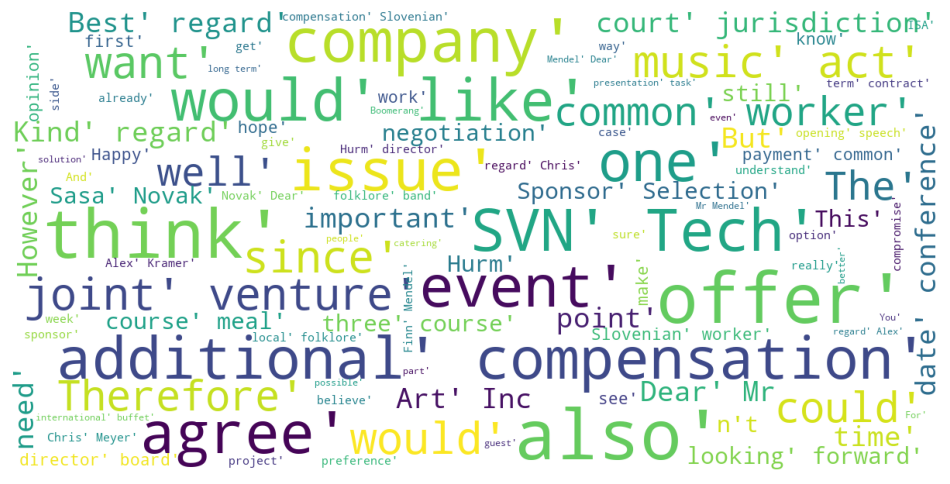

In [15]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(corpus)

# Sentiment analysis
Sentiment analysis is a very common natural language processing task in which we determine if the text is positive, negative or neutral. This is very useful for finding the sentiment associated with reviews, comments which can get us some valuable insights out of text data.

## Textblob
Textblob is a python library built on top of nltk. It has been around for some time and is very easy and convenient to use.

The sentiment function of TextBlob returns two properties:

polarity: is a floating-point number that lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement.
subjectivity: refers to how someone’s judgment is shaped by personal opinions and feelings. Subjectivity is represented as a floating-point value which lies in the range of [0,1].
I will run this function on our news headlines.

In [16]:
# Install textblob if not already installed
%pip install textblob

from textblob import TextBlob

TextBlob('100 people killed in Iraq').sentiment

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Sentiment(polarity=-0.2, subjectivity=0.0)

TextBlob claims that the text “100 people killed in Iraq” is negative and is not an opinion or feeling but rather a factual statement. I think we can agree with TextBlob here.

Now that we know how to calculate those sentiment scores we can visualize them using a histogram and explore data even further.

<Axes: >

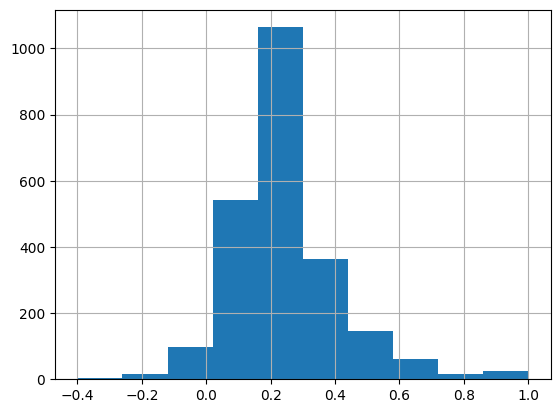

In [17]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

df['polarity_score']=df['Content'].apply(lambda x : polarity(x))
df['polarity_score'].hist()


You can see that the polarity mainly ranges between 0.00 and 0.30. This indicates that the majority of the Content negotiation messages are neutral.

Let’s dig a bit deeper by classifying the news as negative, positive and neutral based on the scores.

<BarContainer object of 3 artists>

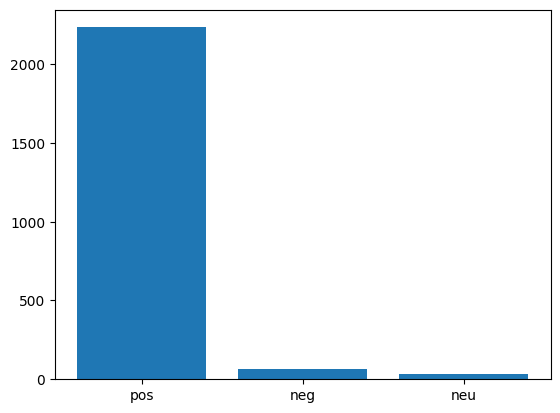

In [18]:
def sentiment(x):
    if x<0:
        return 'neg'
    elif x==0:
        return 'neu'
    else:
        return 'pos'

df['polarity']=df['polarity_score'].map(lambda x: sentiment(x))

plt.bar(df.polarity.value_counts().index,df.polarity.value_counts())


 We can see that 90 % of the Content is positive with only small percentage negative and neutral messages

Let’s take a look at some of the positive and negative headlines

In [19]:
df[df['polarity']=='pos']['Content'].head()


0    Dear Mr. Mendel, \nHope you are doing well! \n...
1    Dear Mr. Novak, \nThank you for reaching out t...
2    Dear Mr. Mendel, \nThank your kind response – ...
3    Dear Mr. Novak, \nThank you for your swift rep...
4    Dear Mr. Mendel, \nThank you for your proposal...
Name: Content, dtype: object

In [20]:
df[df['polarity']=='neg']['Content'].head()


10    Dear Mr. Novak, \nUnfortunately the number of ...
21    Dear Mr. Novak, \nI am sorry to hear that you ...
64    Dear Mr. Novak, \nThank you for your fast repl...
72    Dear Finn, \nI would like to clarify a final o...
75    Dear sasa, \nLike a mentioned before.. jurisdi...
Name: Content, dtype: object

# Vader sentiment analysis
The next library we are going to discuss is VADER. Vader works better in detecting negative sentiment. It is very useful in the case of social media text sentiment analysis.

VADER or Valence Aware Dictionary and Sentiment Reasoner is a rule/lexicon-based, open-source sentiment analyzer pre-built library, protected under the MIT license.

VADER sentiment analysis class returns a dictionary that contains the probabilities of the text for being positive, negative and neutral. Then we can filter and choose the sentiment with most probability.

We will do the same analysis using VADER and check if there is much difference.



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\TColt/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


<BarContainer object of 3 artists>

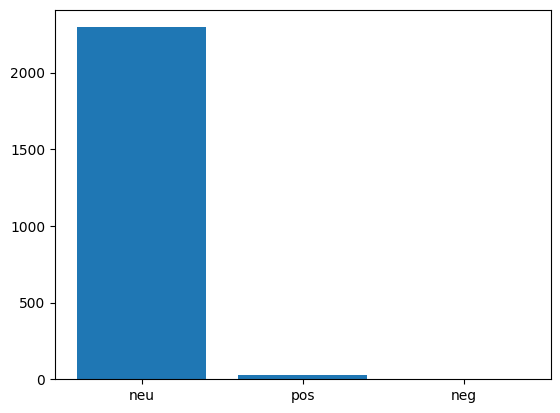

In [21]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

def get_vader_score(sent):
    # Polarity score returns dictionary
    ss = sid.polarity_scores(sent)
    #return ss
    return np.argmax(list(ss.values())[:-1])

df['polarity']=df['Content'].map(lambda x: get_vader_score(x))
polarity=df['polarity'].replace({0:'neg',1:'neu',2:'pos'})

plt.bar(polarity.value_counts().index,polarity.value_counts())

We note a difference in this histogram now we have significantly more neutral sentiments than before. This is because the VADER sentiment analysis tool is more accurate than the TextBlob tool.

# Named entity recognition
Named entity recognition is an information extraction method in which entities that are present in the text are classified into predefined entity types like “Person”,” Place”,” Organization”, etc. By using NER we can get great insights about the types of entities present in the given text dataset.

In [22]:
df

,SenderID,ReceiverID,ActionType,NegoOutcome,Content,polarity_score,polarity
0,70,69,Offer,FinalAccept,"Dear Mr. Mendel, \nHope you are doing well! \n...",0.213699,1
1,69,70,Counteroffer,FinalAccept,"Dear Mr. Novak, \nThank you for reaching out t...",0.165002,1
2,70,69,Counteroffer,FinalAccept,"Dear Mr. Mendel, \nThank your kind response – ...",0.222533,1
3,69,70,Counteroffer,FinalAccept,"Dear Mr. Novak, \nThank you for your swift rep...",0.160333,1
4,70,69,Counteroffer,FinalAccept,"Dear Mr. Mendel, \nThank you for your proposal...",0.122500,1
...,...,...,...,...,...,...,...
2327,851,856,Counteroffer,FinalReject,"Dear Chis Meyer,\n \nthank you for your latest...",0.285340,1
2328,856,851,Counteroffer,FinalReject,"Dear Alex Kramer,\nthank you very much for you...",0.282807,1
2329,851,856,Counteroffer,FinalReject,"Dear Chris Meyer,\nthank you for your fast ans...",0.251786,1
2330,856,851,Counteroffer,FinalReject,"Dear Alex Kramer,\nI am still very interested ...",0.163158,1


In [25]:
import nltk
from nltk import word_tokenize, pos_tag, ne_chunk
from nltk.tree import Tree

# Ensure necessary NLTK data files are downloaded
nltk.download('punkt')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('averaged_perceptron_tagger')

# Function to perform NER on a text
def extract_entities(text):
    words = word_tokenize(text)
    pos_tags = pos_tag(words)
    tree = ne_chunk(pos_tags)
    entities = []
    for subtree in tree:
        if isinstance(subtree, Tree):
            entity = " ".join([word for word, tag in subtree.leaves()])
            entity_type = subtree.label()
            entities.append((entity, entity_type))
    return entities

# Apply the function to the 'Content' column
df['Entities'] = df['Content'].apply(extract_entities)

# Display the DataFrame with extracted entities
print(df[['Content', 'Entities']])

[nltk_data] Downloading package punkt to C:\Users\TColt/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\TColt/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to C:\Users\TColt/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\TColt/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


LookupError: 
**********************************************************************
  Resource [93mmaxent_ne_chunker_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('maxent_ne_chunker_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mchunkers/maxent_ne_chunker_tab/english_ace_multiclass/[0m

  Searched in:
    - 'C:\\Users\\TColt/nltk_data'
    - 'c:\\Users\\TColt\\AppData\\Local\\Programs\\Python\\Python312\\nltk_data'
    - 'c:\\Users\\TColt\\AppData\\Local\\Programs\\Python\\Python312\\share\\nltk_data'
    - 'c:\\Users\\TColt\\AppData\\Local\\Programs\\Python\\Python312\\lib\\nltk_data'
    - 'C:\\Users\\TColt\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************
